# Unit 5 - Financial Planning

In [197]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [198]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [199]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [200]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [201]:
# Fetch current BTC price
btc_responce = requests.get(btc_url).json()

# Fetch current ETH price
eth_responce = requests.get(eth_url).json()

# # Compute current value of my crpto
my_btc_value = btc_response['data']['1']['quotes']['USD']['price']
my_eth_value = eth_response['data']['1027']['quotes']['USD']['price']

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $20905.00
The current value of your 5.3 ETH is $1171.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [202]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [203]:
# Set Alpaca API key and secret
APCA_API_KEY_ID = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(
    APCA_API_KEY_ID,
    alpaca_secret_key,
    api_version = "v2"
)

In [204]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-07-7", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-7", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data_df = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_data_df[ticker_data_df['symbol']=="AGG"].drop('symbol', axis=1)
SPY = ticker_data_df[ticker_data_df['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
ticker_data_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

ticker_data_df.index = ticker_data_df.index.date

# Preview DataFrame
ticker_data_df.head()

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2022-07-07  101.94  101.9799  101.52  101.61  8220620       17966  101.626894   

               SPY                                                             
              open    high      low   close    volume trade_count        vwap  
2022-07-07  385.12  389.83  383.267  388.99  64172156      467708  387.621834

In [205]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data_df["AGG"]["close"]
spy_close_price = ticker_data_df['SPY']['close']

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2022-07-07    101.61
Name: close, dtype: float64
Current SPY closing price: $2022-07-07    388.99
Name: close, dtype: float64


In [206]:
# Compute the current value of shares
agg_close_price_float = float(agg_close_price)
spy_close_price_float = float(spy_close_price)

my_spy_value = my_spy * agg_close_price_float
my_agg_value = my_agg * spy_close_price_float

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5080.50
The current value of your 200 AGG shares is $77798.00


### Savings Health Analysis

In [207]:
# Set monthly household income
monthly_income = 1,200
# Consolidate financial assets data
total_crypto_wallet = my_btc_value + my_eth_value
total_stocks_bonds_float = my_spy_value + my_agg_value
savings_data = [total_crypto_wallet, total_stocks_bonds_float]

# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=["amount"], index=["crypto", "stock/bond"])
 
# Display savings DataFrame
display(savings_df)

,amount
crypto,22076.97
stock/bond,82878.50


<AxesSubplot:title={'center':'Portfolio Composition - August 7, 2020'}, ylabel='amount'>

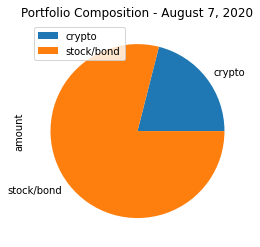

In [208]:
# Plot savings pie chart
savings_df.plot.pie(y='amount', title="Portfolio Composition - August 7, 2020")

In [209]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
portfolio_total = total_crypto_wallet + total_stocks_bonds_float
portfolio_total_float = float(portfolio_total)

# Validate saving health
print(f"The total value of the portfolio's savings is ${portfolio_total_float:0.2f}")


The total value of the portfolio's savings is $104955.47


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [210]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [211]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

five_year_portfolio_df = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = five_year_portfolio_df[five_year_portfolio_df['symbol']=="AGG"].drop('symbol', axis=1)
SPY = five_year_portfolio_df[five_year_portfolio_df['symbol']=="SPY"].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
five_year_portfolio_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
five_year_portfolio_df.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [212]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims= 30

MC_portfolio = MCSimulation(
    portfolio_data = five_year_portfolio_df,
    weights=[.60, .40],
    num_simulation = num_sims,
    num_trading_days = 252*3
)

In [213]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [214]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995247,1.003295,1.002436,1.000728,1.002902,1.003236,0.995418,0.999341,0.992204,1.001062,...,1.002359,0.997166,0.994609,0.994960,0.997240,0.995370,1.001100,0.997638,0.996401,1.004604
2,0.991691,1.009904,1.009571,0.998305,1.000464,1.009313,1.003545,1.004712,0.994625,0.999366,...,1.000543,0.993354,0.999129,0.991234,0.989545,0.987992,1.002205,0.995483,0.994699,0.994894
3,0.985186,1.006845,1.006144,0.993749,0.993775,1.001737,1.004499,1.001314,0.996879,1.004517,...,1.009277,0.996026,1.006111,0.994039,0.988067,0.994312,1.006731,0.987000,0.990474,1.000607
4,0.978710,1.007340,1.003839,0.988495,0.995962,1.005626,1.012256,1.003801,0.994204,1.011815,...,1.002115,0.999079,1.008377,0.997095,0.981558,0.998249,1.006951,0.990152,0.993436,0.996601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.452733,1.340297,1.223405,1.015263,1.084196,1.611260,1.416298,0.782510,1.006061,0.864209,...,1.367512,1.148418,1.607709,1.348712,1.143322,1.289314,0.859789,1.008298,1.224805,1.170212
753,1.449702,1.333747,1.216586,1.012874,1.085952,1.602046,1.420156,0.777163,1.003432,0.869033,...,1.359689,1.140453,1.610613,1.341938,1.140612,1.290320,0.864620,1.008061,1.226055,1.165235
754,1.460794,1.325247,1.209827,1.015487,1.080600,1.613329,1.432349,0.769950,1.007980,0.866789,...,1.358457,1.148255,1.605590,1.346915,1.136941,1.285714,0.863045,1.004911,1.231361,1.175037
755,1.468065,1.322593,1.214584,1.012402,1.071271,1.618291,1.423779,0.764447,1.008921,0.857606,...,1.356621,1.147334,1.606523,1.347008,1.126781,1.289562,0.870820,1.002750,1.228310,1.180205


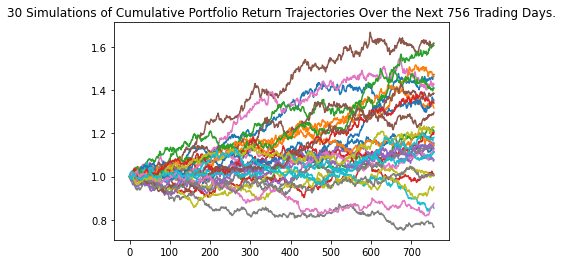

In [215]:
# Plot simulation outcomes
MC_portfolio_line_plot_30year = MC_portfolio.plot_simulation()


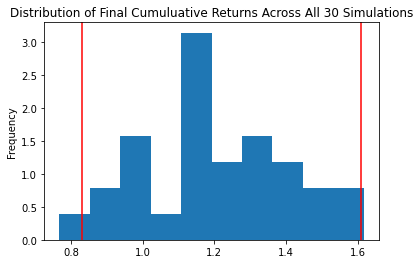

In [216]:
# Plot probability distribution and confidence intervals
MC_portfolio_dist_plot_30year = MC_portfolio.plot_distribution()

### Retirement Analysis

In [217]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_portfolio_summary_stats_30year = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(MC_portfolio_summary_stats_30year)

count           30.000000
mean             1.199407
std              0.212962
min              0.767480
25%              1.086403
50%              1.167511
75%              1.350187
max              1.617160
95% CI Lower     0.830240
95% CI Upper     1.609915
Name: 756, dtype: float64


/Users/carlbent/Desktop/Module 5/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [218]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_portfolio_summary_stats_30year[8] * initial_investment
ci_upper = MC_portfolio_summary_stats_30year[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $16604.8005741125 and $32198.295977393966


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [219]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_portfolio_summary_stats_30year[8] * initial_investment
ci_upper = MC_portfolio_summary_stats_30year[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $24907.200861168752 and $48297.44396609095


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [220]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [221]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [222]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [223]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [224]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [225]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")